In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 数据提取

In [3]:
train_data = pd.read_csv("../data/pubg/train_V2_clear.csv")
train_data.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,matchType_flaretpp,matchType_normal-duo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,...,0,0,0,0,0,0,0,1,606565,29087
1,eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,...,0,0,0,0,0,0,0,1,818060,31658
2,1eaf90ac73de72,1,0,68.00,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,833566,3036
3,4616d365dd2853,0,0,32.90,0,0,0,75,0,0,...,0,0,0,0,0,0,0,1,1324636,43738
4,315c96c26c9aac,0,0,100.00,0,0,0,45,0,1,...,0,0,0,0,0,1,0,0,1737142,19848


## sample函数截取部分数据 不使用截取和欠采样

In [4]:
train_data_sample = train_data.sample(100000)
train_data_sample.shape

(100000, 50)

In [5]:
train_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2442395 to 287190
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Id                          100000 non-null  object 
 1   assists                     100000 non-null  int64  
 2   boosts                      100000 non-null  int64  
 3   damageDealt                 100000 non-null  float64
 4   DBNOs                       100000 non-null  int64  
 5   headshotKills               100000 non-null  int64  
 6   heals                       100000 non-null  int64  
 7   killPlace                   100000 non-null  int64  
 8   killPoints                  100000 non-null  int64  
 9   kills                       100000 non-null  int64  
 10  killStreaks                 100000 non-null  int64  
 11  longestKill                 100000 non-null  float64
 12  matchDuration               100000 non-null  int64  
 13  maxPlace

In [6]:
train_data_sample.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_flaretpp,matchType_normal-duo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,1.000000e+05,100000.00000
mean,0.226960,1.111850,129.695001,0.654760,0.22316,1.36972,47.846910,503.042800,0.915610,0.545360,...,0.000610,0.000080,0.000020,0.00027,0.039030,0.120330,0.142550,0.39658,1.002300e+06,23119.20643
std,0.568781,1.720131,166.525079,1.121955,0.58493,2.68198,27.473192,628.141365,1.501236,0.711483,...,0.024691,0.008944,0.004472,0.01643,0.193667,0.325349,0.349615,0.48919,5.781685e+05,13412.79603
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,6.000000e+00,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,5.021815e+05,11514.75000
50%,0.000000,0.000000,84.180000,0.000000,0.00000,0.00000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.002261e+06,23083.50000
75%,0.000000,2.000000,185.200000,1.000000,0.00000,2.00000,71.000000,1172.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,1.501812e+06,34772.00000
max,9.000000,15.000000,2459.000000,19.000000,16.00000,47.00000,100.000000,2087.000000,20.000000,8.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,2.002805e+06,46350.00000


## 获取特征值和目标值

In [7]:
x = train_data_sample.drop(["winPlacePerc", "Id"], axis=1)
y = train_data_sample["winPlacePerc"]
x.shape, y.shape

((100000, 48), (100000,))

## 分隔数据集和测试集

In [11]:
x_train_r1, x_val_r1, y_train_r1, y_val_r1 = train_test_split(x, y ,test_size=0.2, random_state=0)
x_train_r1.shape, y_train_r1.shape

((80000, 48), (80000,))

# 使用随机森林RandomForestRegressor进行模型训练

- RandomForestClassifier 处理分类问题
- RandomForestRegressor 处理回归问题

In [12]:
rfr1 = RandomForestRegressor(
    n_estimators=40,
    min_samples_leaf=3,
    max_features="sqrt",
    n_jobs=-1
)

## 训练

In [13]:
rfr1.fit(x_train_r1, y_train_r1)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

## 得分

In [14]:
rfr1.score(x_val_r1, y_val_r1)

0.9099571479073717

In [15]:
rfr1_y_pred = rfr1.predict(x_val_r1)

In [16]:
# 平均绝对误差
mean_absolute_error(y_val_r1, rfr1_y_pred)

0.06713188659550264

In [17]:
# 均方误差
mean_squared_error(y_val_r1, rfr1_y_pred)

0.008592919033339936

## feature_importances_ 获取重要的列

In [18]:
# 特征重要性,按照列名排序
rfr1.feature_importances_

array([2.98426362e-03, 7.58459592e-02, 1.57671691e-02, 2.77952417e-03,
       8.61715673e-04, 3.04773934e-02, 1.99316957e-01, 2.26625348e-03,
       5.46830411e-03, 3.37122422e-03, 2.71642597e-02, 9.84259794e-03,
       5.49427907e-03, 6.25507779e-03, 3.98973879e-03, 1.11668616e-03,
       2.17196703e-02, 2.48224609e-05, 3.17249621e-03, 1.33487310e-04,
       2.34469773e-05, 2.42585474e-01, 5.23542521e-02, 2.65762490e-03,
       4.61025852e-03, 1.56424333e-02, 2.34394643e-02, 6.69798632e-03,
       1.09380578e-02, 6.28947632e-02, 1.42168402e-01, 0.00000000e+00,
       4.82416322e-03, 2.71122175e-05, 0.00000000e+00, 2.08260421e-04,
       5.14725340e-04, 0.00000000e+00, 1.20409105e-07, 0.00000000e+00,
       0.00000000e+00, 1.69949633e-07, 1.29891116e-04, 8.77280238e-04,
       1.12291965e-03, 9.80503884e-04, 4.63748750e-03, 4.61332223e-03])

In [19]:
# 创建列名和重要性的df
important_columns = pd.DataFrame({"column": x.columns, "important": rfr1.feature_importances_})
important_columns.head()

,column,important
0,assists,0.002984
1,boosts,0.075846
2,damageDealt,0.015767
3,DBNOs,0.002780
4,headshotKills,0.000862


In [20]:
important_columns_sort = important_columns.sort_values("important", ascending=False)

<AxesSubplot: ylabel='column'>

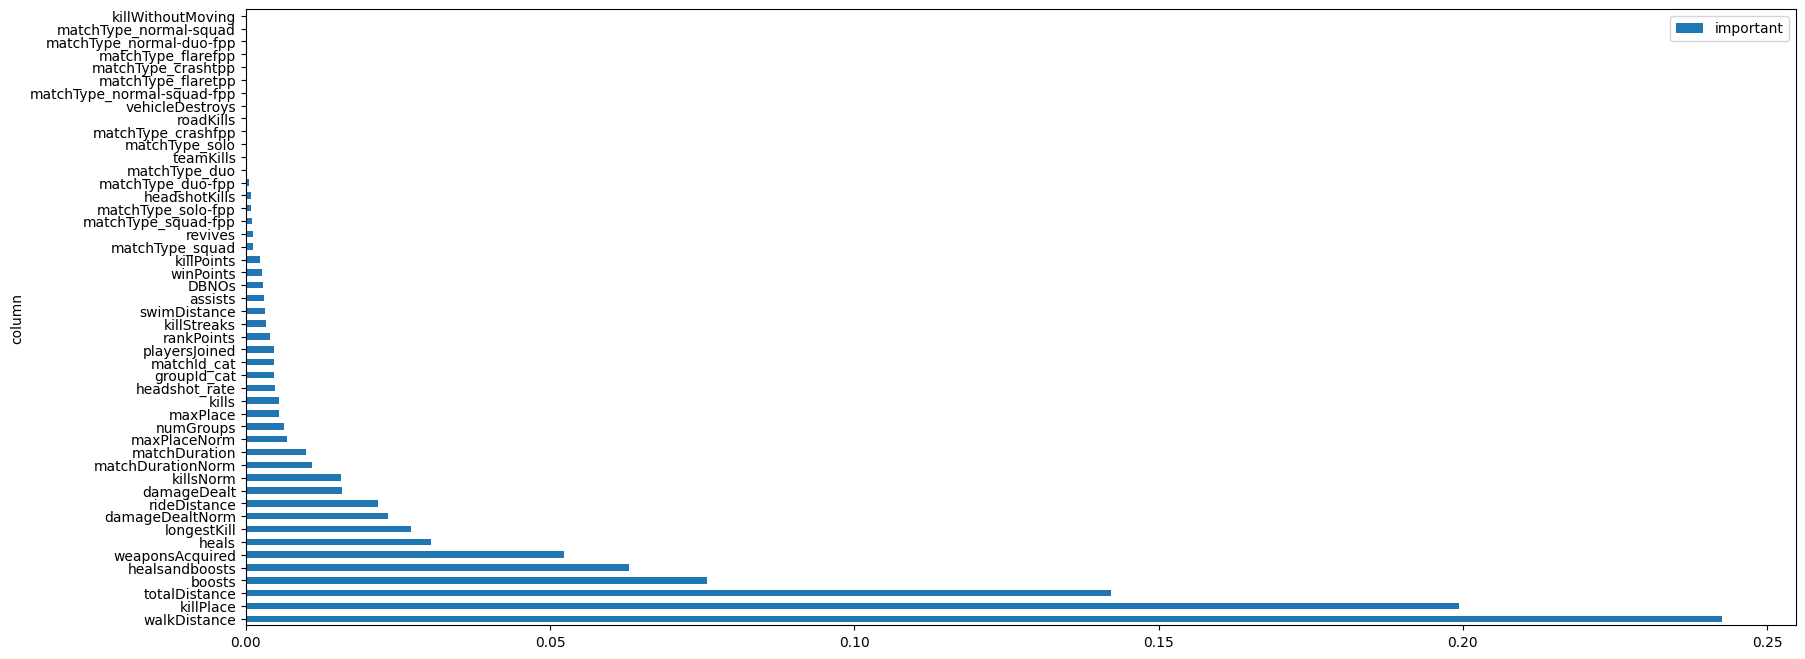

In [21]:
# 重要性画图
important_columns_sort.plot("column", "important", figsize=(20, 8), kind="barh")

In [22]:
keep_cols = important_columns_sort[important_columns_sort["important"] > 0.005]["column"]
keep_cols

21         walkDistance
6             killPlace
30        totalDistance
1                boosts
29       healsandboosts
22      weaponsAcquired
5                 heals
10          longestKill
26      damageDealtNorm
16         rideDistance
2           damageDealt
25            killsNorm
28    matchDurationNorm
11        matchDuration
27         maxPlaceNorm
13            numGroups
12             maxPlace
8                 kills
Name: column, dtype: object

In [23]:
x_keep_r = x[keep_cols]
x_keep_r.shape

(100000, 18)

In [24]:
x_train_r2, x_val_r2, y_train_r2, y_val_r2 = train_test_split(x_keep_r, y, test_size=0.2, random_state=0)
x_train_r2.shape, x_val_r2.shape, y_train_r2.shape, y_val_r2.shape

((80000, 18), (20000, 18), (80000,), (20000,))

## 使用重要的列重新训练模型

In [25]:
rfr2 = RandomForestRegressor(n_estimators=40,
                     min_samples_leaf=3,
                     max_features='sqrt',
                     n_jobs=-1)

In [26]:
rfr2.fit(x_train_r2, y_train_r2)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

## 得分

In [27]:
rfr2.score(x_val_r2, y_val_r2)

0.9180795830644551

In [28]:
rfr2_y_pred = rfr2.predict(x_val_r2)

In [29]:
# 平均绝对误差
mean_absolute_error(y_val_r2, rfr2_y_pred)

0.0633310043484778

In [30]:
# 均方误差
mean_squared_error(y_val_r2, rfr1_y_pred)

0.008592919033339936

# 使用lightGBM对模型进行训练

## 模型初步尝试

In [31]:
x_train_l1, x_val_l1, y_train_l1, y_val_l1 = train_test_split(x, y ,test_size=0.2, random_state=0)
x_train_l1.shape, y_train_l1.shape

((80000, 48), (80000,))

In [33]:
lgbmr1 = LGBMRegressor(
                      learning_rate=0.05,
                      n_estimators=20
                      )

In [34]:
lgbmr1.fit(x_train_l1, y_train_l1, eval_set=[(x_val_l1, y_val_l1)], eval_metric="l1")

[1]	valid_0's l1: 0.257747	valid_0's l2: 0.0874331
[2]	valid_0's l1: 0.246462	valid_0's l2: 0.0801902
[3]	valid_0's l1: 0.235766	valid_0's l2: 0.0736077
[4]	valid_0's l1: 0.225687	valid_0's l2: 0.067678
[5]	valid_0's l1: 0.21618	valid_0's l2: 0.0623023
[6]	valid_0's l1: 0.207123	valid_0's l2: 0.057404
[7]	valid_0's l1: 0.198665	valid_0's l2: 0.0530095
[8]	valid_0's l1: 0.190606	valid_0's l2: 0.0489911
[9]	valid_0's l1: 0.183071	valid_0's l2: 0.0453858
[10]	valid_0's l1: 0.176021	valid_0's l2: 0.042131
[11]	valid_0's l1: 0.169261	valid_0's l2: 0.0391355
[12]	valid_0's l1: 0.162851	valid_0's l2: 0.0363814
[13]	valid_0's l1: 0.1568	valid_0's l2: 0.0338934
[14]	valid_0's l1: 0.151152	valid_0's l2: 0.0316633
[15]	valid_0's l1: 0.145826	valid_0's l2: 0.0296208
[16]	valid_0's l1: 0.140777	valid_0's l2: 0.0277601
[17]	valid_0's l1: 0.136049	valid_0's l2: 0.0260678
[18]	valid_0's l1: 0.131622	valid_0's l2: 0.0245343
[19]	valid_0's l1: 0.127392	valid_0's l2: 0.0231265
[20]	valid_0's l1: 0.123532

LGBMRegressor(learning_rate=0.05, n_estimators=20)

## 得分

In [39]:
lgbmr1.score(x_val_l1, y_val_l1)

0.770585131598013

In [40]:
lgbmr1_y_pred = lgbmr1.predict(x_val_l1)

In [41]:
# 平均绝对误差
mean_absolute_error(y_val_l1, lgbmr1_y_pred)

0.123531980441887

In [42]:
# 均方误差
mean_squared_error(y_val_l1, lgbmr1_y_pred)

0.021893391239924998

# lightGBM GridSearchCV

In [43]:
lgbmr2 = LGBMRegressor()

In [61]:
param_grid = {
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "n_estimators":  [100, 200, 300, 400, 500],
    "max_depth":     [3, 5, 7, 9, 11],
}

In [62]:
gs = GridSearchCV(lgbmr2, param_grid=param_grid, n_jobs=-1)

In [60]:
gs.fit(x_train_l1, y_train_l1)

GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [57]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

## 得分

In [49]:
gs.score(x_val_l1, y_val_l1)

0.937579968425018

In [54]:
lgbmr2_y_pred = gs.predict(x_val_l1)

In [55]:
# 平均绝对误差
mean_absolute_error(y_val_l1, lgbmr2_y_pred)

0.05588211745582938

In [56]:
# 均方误差
mean_squared_error(y_val_l1, lgbmr2_y_pred)

0.005956833495573545

In [ ]:
g